In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
nsamp = 3000
field = 'DDF'

total_num = {}
total_num['DDF'] = {}
total_num['DDF']['all'] = 10228
total_num['DDF']['Ia'] = 8613
total_num['DDF']['others'] = total_num['DDF']['all'] - total_num['DDF']['Ia']
total_num['WFD'] = {}
total_num['WFD']['all'] = 1094829
total_num['WFD']['Ia'] = 999789
total_num['WFD']['others'] = total_num['WFD']['all'] - total_num['WFD']['Ia']

In [3]:
max_cont = total_num[field]['others']/nsamp

print('Maximum possible contamination: ', max_cont)

Maximum possible contamination:  0.5383333333333333


In [4]:
cont_axis = np.arange(0.0, 1, 0.01)

metrics = []

for c in cont_axis:

    ccIa = int(nsamp * (1 - c))
    wcIa = total_num[field]['Ia'] - ccIa

    wcOther = int(nsamp * c)
    ccOther = total_num[field]['others'] - wcOther
    
    if wcOther <= nsamp and ccOther >= 0:

        eff = ccIa/total_num[field]['Ia']
        acc = (ccIa + ccOther)/total_num[field]['all']
        pur = ccIa/(ccIa + wcOther)
        fom = eff + ccIa/(ccIa + 3*wcOther)

        line = [acc, eff, pur, fom, ccIa, wcIa, ccOther, wcOther, c]
        metrics.append(line)

metrics_res = pd.DataFrame(metrics, columns=['acc', 'eff', 'pur', 'fom', 'ccIa', 'wcIa', 'ccOther', 'wcOther', 'cont'])

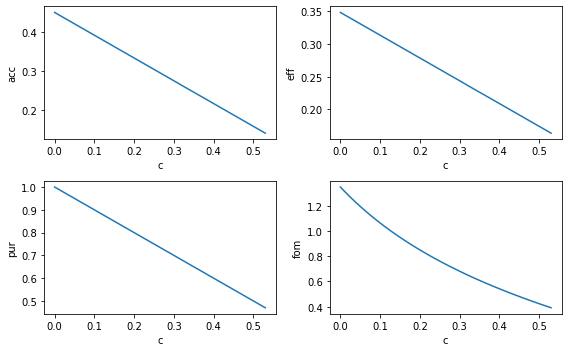

In [5]:
plt.figure(figsize=(8, 5))

for i in range(4):
    name = list(metrics_res.keys())[i]
    plt.subplot(2,2, i + 1)
    plt.plot(metrics_res['cont'], metrics_res[name])
    plt.xlabel('c')
    plt.ylabel(name)
    
plt.tight_layout()
plt.show()

In [6]:
metrics_res = metrics_res[metrics_res['cont'].values <=0.25]

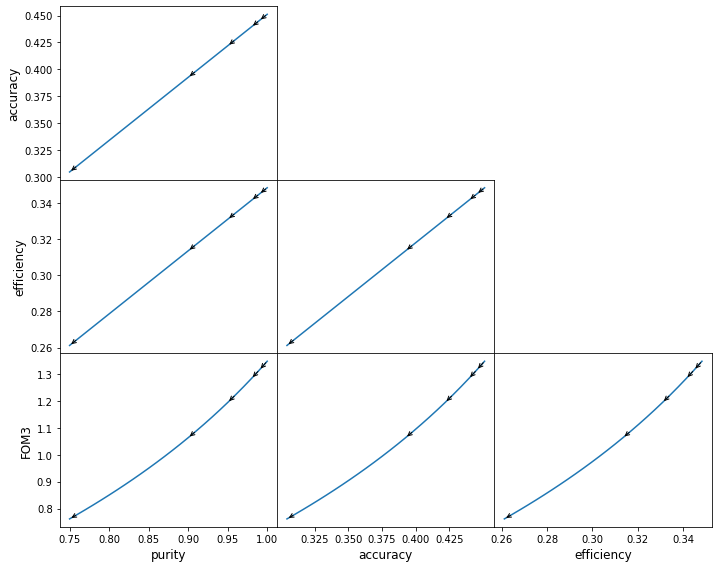

In [12]:
step = 1
fs=12
#pos_list = np.arange(1, min(50, metrics_res.shape[0]), 10)
pos_list = np.arange(metrics_res.shape[0])[np.array([item in [0.0, 0.01, 0.04, 0.09, 0.24] for item in metrics_res['cont'].values])]

plt.figure(figsize=(10, 8))

ax1 = plt.subplot(3,3, 1)
plt.plot(metrics_res['pur'], metrics_res['acc'])
for indx1 in pos_list:
    ax1.annotate("", xy=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['acc']), 
                 xytext=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['acc']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.ylabel('accuracy', fontsize=fs)

ax4 = plt.subplot(3,3, 4)
plt.plot(metrics_res['pur'], metrics_res['eff'])
for indx1 in pos_list:
    ax4.annotate("", xy=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['eff']), 
                 xytext=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['eff']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.ylabel('efficiency', fontsize=fs)

ax5 = plt.subplot(3,3, 5)
plt.plot(metrics_res['acc'], metrics_res['eff'])
for indx1 in pos_list:
    ax5.annotate("", xy=(metrics_res.iloc[indx1 + step]['acc'], metrics_res.iloc[indx1 + step]['eff']), 
                 xytext=(metrics_res.iloc[indx1]['acc'], metrics_res.iloc[indx1]['eff']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.yticks([])

ax7 = plt.subplot(3,3, 7)
plt.plot(metrics_res['pur'], metrics_res['fom'])
for indx1 in pos_list:
    ax7.annotate("", xy=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['fom']), 
                 xytext=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.ylabel('FOM3', fontsize=fs)
plt.xlabel('purity', fontsize=fs)


ax5 = plt.subplot(3,3, 8)
plt.plot(metrics_res['acc'], metrics_res['fom'])
for indx1 in pos_list:
    ax5.annotate("", xy=(metrics_res.iloc[indx1 + step]['acc'], metrics_res.iloc[indx1 + step]['fom']), 
                 xytext=(metrics_res.iloc[indx1]['acc'], metrics_res.iloc[indx1]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xlabel('accuracy', fontsize=fs)
plt.yticks([])
plt.xticks([0.325, 0.350, 0.375, 0.400, 0.425])

ax6 = plt.subplot(3,3, 9)
plt.plot(metrics_res['eff'], metrics_res['fom'])

for indx1 in pos_list:
    ax6.annotate("", xy=(metrics_res.iloc[indx1+step]['eff'], metrics_res.iloc[indx1+step]['fom']), 
                 xytext=(metrics_res.iloc[indx1]['eff'], metrics_res.iloc[indx1]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xlabel('efficiency', fontsize=fs)
plt.yticks([])
plt.xticks([0.26, 0.28,0.30, 0.32, 0.34])

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('simple_metrics.pdf')
plt.show()